In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


https://keras.io/examples/nlp/text_classification_with_transformer/

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, Embedding, LSTM, Bidirectional
from sklearn.model_selection import train_test_split

In [3]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [4]:
pwd_train_40 = '/content/drive/MyDrive/Colab Notebooks/NLP proj/data_thresh40/train_data.csv'
pwd_val_40 = '/content/drive/MyDrive/Colab Notebooks/NLP proj/data_thresh40/val_data.csv'
pwd_test_40 = '/content/drive/MyDrive/Colab Notebooks/NLP proj/data_thresh40/test_data.csv'

train_df = pd.read_csv(pwd_train_40)
val_df = pd.read_csv(pwd_val_40)
test_df = pd.read_csv(pwd_test_40)

In [5]:
X_train = train_df['clean_content']
X_val = val_df['clean_content']
X_test = test_df['clean_content']

In [6]:
#Get cleaned input sequence
t=[]
for i in X_train:
  t.append(i.strip('!"#$%&()*+,-.–—/:;<=>?@[\\]^_`{|}~\t\r\n'))       
v=[]
for i in X_val:
  v.append(i.strip('!"#$%&()*+,-.–—/:;<=>?@[\\]^_`{|}~\t\r\n'))
e=[]
for i in X_test:
  e.append(i.strip('!"#$%&()*+,-.–—/:;<=>?@[\\]^_`{|}~\t\r\n'))

x_train=[]
for i in range(len(t)):
  x_train.append(' '.join(t[i].split('\n')))
x_val=[]
for i in range(len(v)):
  x_val.append(' '.join(v[i].split('\n')))
x_test=[]
for i in range(len(e)):
  x_test.append(' '.join(e[i].split('\n')))
print(len(x_train),len(x_val),len(x_test))

x_train = [i.split(' ') for i in x_train]
x_test = [i.split(' ') for i in x_test]
xv=[]
for i in x_val:
  xv.append(i.split(' '))
x_val=xv

457 127 59


In [ ]:
#check input
print(x_train[4])
print(x_val[5])
print(x_test[2])

['sometim', 'someth', 'like', 'second', 'wash', 'base', 'street', 'th', 'father', 'two', 'assistants', 'ar', 'given', 'permiss', 'go', 'on', 'woman', 'ask', '“why', 'did', 'come', 'first', 'place', 'to', 'citadel', 'dampness”', '', 'som', 'day', 'wors', 'others', 'even', "can't", 'believ', 'them', 'but', 'never', 'concern', 'mine', 'reason', 'patient', '', 's', 'scroll', 'never', 'blast', 'us', 'into', 'marmor', 'mean', 'fist', 'it', 'kudo', 'princ', 'journey', 'here', 'to', 'negoti', 'releas', 'believ', 'it', '', "you'r", 'right', 'ballad', 'retreating', 'back', 'atmosphere', 'they', "won't", 'come', 'round', 'again', 'mak', 'peac']
['mani', 'time', 'low', 'foot', 'stagger', 'solder', 'mouth', 'tell', 'tri', 'stir', 'aw', 'rivet', 'tri', 'lift', 'hasp', 'steel', '', 'strok', 'cool', 'forehead', 'hot', 'often', 'lift', 'care', 'listless', 'hair', 'handl', 'adamantin', 'fingers', 'nev', 'thimbl', 'shall', 'wear', 'buzz', 'dull', 'fli', 'chamber', 'window', 'brave', 'shine', 'sun', 'frec

In [7]:
#(Optional) Splitting input sequence
max_len = 250
author_train=[]
poem_train=[]
for k in range(len(x_train)):
  x = x_train[k]
  if len(x) > max_len:  #Can choose different length
    chunks, chunk_size = len(x), max_len
    a=[x[i:i+int(chunk_size)] for i in range(0, int(chunks), int(chunk_size)) ]
    for j in a:
      poem_train.append(j)
      author_train.append(train_df['author'][k])
  else:
    poem_train.append(x)
    author_train.append(train_df['author'][k])

author_val=[]
poem_val=[]
for k in range(len(x_val)):
  x = x_val[k]
  if len(x) > max_len:
    chunks, chunk_size = len(x), max_len
    a=[x[i:i+int(chunk_size)] for i in range(0, int(chunks), int(chunk_size)) ]
    for j in a:
      poem_val.append(j)
      author_val.append(val_df['author'][k])
  else:
    poem_val.append(x)
    author_val.append(val_df['author'][k])

author_test=[]
poem_test=[]
for k in range(len(x_test)):
  x = x_test[k]
  if len(x) > max_len:
    chunks, chunk_size = len(x), max_len
    a=[x[i:i+int(chunk_size)] for i in range(0, int(chunks), int(chunk_size)) ]
    for j in a:
      poem_test.append(j)
      author_test.append(test_df['author'][k])
  else:
    poem_test.append(x)
    author_test.append(test_df['author'][k])

print(len(author_train)==len(poem_train))
print(len(author_val)==len(poem_val))    
print(len(author_test)==len(poem_test))

True
True
True


In [30]:
#Check distribution
from collections import Counter
Counter(author_train)

Counter({'Alfred, Lord Tennyson': 106,
         'Emily Dickinson': 40,
         'John Ashbery': 40,
         'John Donne': 40,
         'Kay Ryan': 29,
         'Percy sshe Shelley': 73,
         'Rae Armantrout': 44,
         'Walt Whitman': 83,
         'William Butler Yeats': 36,
         'William Shakespeare': 86,
         'William Wordsworth': 76,
         'Yusef Komunyakaa': 32})

In [8]:
# Tokenize the dataset
MAX_NB_WORDS = 50000
oov_token = "<UNK>"
padding_type = "post"
trunction_type='post'
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, oov_token=oov_token,filters='!"#$%&()*+,-–./:;<=>?@[\\]^_`{|}~\t\n\r')
tokenizer.fit_on_texts(poem_train)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 15310 unique tokens.


In [9]:
X_train_sequences = tokenizer.texts_to_sequences(poem_train)
X_train_padded = pad_sequences(X_train_sequences, padding=padding_type, 
                       truncating=trunction_type)
X_val_sequences = tokenizer.texts_to_sequences(poem_val)
X_val_padded = pad_sequences(X_val_sequences, padding=padding_type,
                       truncating=trunction_type)

X_test_sequences = tokenizer.texts_to_sequences(poem_test)
X_test_padded = pad_sequences(X_test_sequences, padding=padding_type, 
                       truncating=trunction_type)

In [10]:
X_train_padded.shape

(685, 250)

In [11]:
#Encode label to numbers  (Use 'SparseCategoricalCrossentropy' if using numbers)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(author_train)
y_train=le.transform(author_train)
y_val=le.transform(author_val)
y_test=le.transform(author_test)

In [12]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'Alfred, Lord Tennyson': 0, 'Emily Dickinson': 1, 'John Ashbery': 2, 'John Donne': 3, 'Kay Ryan': 4, 'Percy sshe Shelley': 5, 'Rae Armantrout': 6, 'Walt Whitman': 7, 'William Butler Yeats': 8, 'William Shakespeare': 9, 'William Wordsworth': 10, 'Yusef Komunyakaa': 11}


In [ ]:
y_train.shape

(685,)

In [ ]:
from keras.utils import to_categorical
to_categorical(y_train)

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
to_categorical(y_train).shape

(685, 12)

In [ ]:
#didn't run 
#(Optional)One hot encoding   (Use 'categorical_crossentropy' if using one hot)
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)


In [13]:
class MultiHeadSelfAttention(layers.Layer):
    def __init__(self, embed_dim, num_heads=8):
        super(MultiHeadSelfAttention, self).__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        if embed_dim % num_heads != 0:
            raise ValueError(
                f"embedding dimension = {embed_dim} should be divisible by number of heads = {num_heads}"
            )
        self.projection_dim = embed_dim // num_heads
        self.query_dense = layers.Dense(embed_dim)
        self.key_dense = layers.Dense(embed_dim)
        self.value_dense = layers.Dense(embed_dim)
        self.combine_heads = layers.Dense(embed_dim)

    def attention(self, query, key, value):
        score = tf.matmul(query, key, transpose_b=True)
        dim_key = tf.cast(tf.shape(key)[-1], tf.float32)
        scaled_score = score / tf.math.sqrt(dim_key)
        weights = tf.nn.softmax(scaled_score, axis=-1)
        output = tf.matmul(weights, value)
        return output, weights

    def separate_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.projection_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, inputs):
        # x.shape = [batch_size, seq_len, embedding_dim]
        batch_size = tf.shape(inputs)[0]
        query = self.query_dense(inputs)  # (batch_size, seq_len, embed_dim)
        key = self.key_dense(inputs)  # (batch_size, seq_len, embed_dim)
        value = self.value_dense(inputs)  # (batch_size, seq_len, embed_dim)
        query = self.separate_heads(
            query, batch_size
        )  # (batch_size, num_heads, seq_len, projection_dim)
        key = self.separate_heads(
            key, batch_size
        )  # (batch_size, num_heads, seq_len, projection_dim)
        value = self.separate_heads(
            value, batch_size
        )  # (batch_size, num_heads, seq_len, projection_dim)
        attention, weights = self.attention(query, key, value)
        attention = tf.transpose(
            attention, perm=[0, 2, 1, 3]
        )  # (batch_size, seq_len, num_heads, projection_dim)
        concat_attention = tf.reshape(
            attention, (batch_size, -1, self.embed_dim)
        )  # (batch_size, seq_len, embed_dim)
        output = self.combine_heads(
            concat_attention
        )  # (batch_size, seq_len, embed_dim)
        return output


In [14]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadSelfAttention(embed_dim, num_heads)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)


In [15]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions


w/o lr decay, max_len = 250,dim = 128, num_heads = 4

In [16]:
embed_dim = 128  # Embedding size for each token
num_heads = 4  # Number of attention heads
ff_dim = 128  # Hidden layer size in feed forward network inside transformer
nclasses = 12
max_length = 250

inputs = layers.Input(shape=(max_length,))
embedding_layer = TokenAndPositionEmbedding(max_length, MAX_NB_WORDS, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(nclasses, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)


In [17]:
#lr_schedule = keras.optimizers.schedules.ExponentialDecay(
#    initial_learning_rate=1e-2,
#    decay_steps=10000,
#    decay_rate=0.9)
#opt = keras.optimizers.Adam(learning_rate=lr_schedule)
#model.compile(opt, "sparse_categorical_crossentropy", metrics=["accuracy"])

model.compile('adam', "sparse_categorical_crossentropy", metrics=["accuracy"])


In [18]:
#run 1a, w/o lr decay, dim = 128
history = model.fit(
    X_train_padded, y_train, batch_size=32, epochs=30, validation_data=(X_val_padded, y_val)
)

Epoch 1/30
22/22 [==============================] - 7s 303ms/step - loss: 2.4994 - accuracy: 0.0891 - val_loss: 2.4777 - val_accuracy: 0.1401
Epoch 2/30
22/22 [==============================] - 6s 289ms/step - loss: 2.3078 - accuracy: 0.1445 - val_loss: 2.3853 - val_accuracy: 0.1783
Epoch 3/30
22/22 [==============================] - 6s 289ms/step - loss: 2.0991 - accuracy: 0.2453 - val_loss: 2.4043 - val_accuracy: 0.1401
Epoch 4/30
22/22 [==============================] - 6s 287ms/step - loss: 1.9160 - accuracy: 0.2788 - val_loss: 2.3293 - val_accuracy: 0.1975
Epoch 5/30
22/22 [==============================] - 6s 288ms/step - loss: 1.6394 - accuracy: 0.3445 - val_loss: 2.0449 - val_accuracy: 0.2611
Epoch 6/30
22/22 [==============================] - 6s 288ms/step - loss: 1.3971 - accuracy: 0.4628 - val_loss: 1.9427 - val_accuracy: 0.3121
Epoch 7/30
22/22 [==============================] - 6s 286ms/step - loss: 0.9796 - accuracy: 0.6584 - val_loss: 1.8486 - val_accuracy: 0.3694
Epoch 

In [ ]:
#run 1b, w/o lr decay, dim = 128
history = model.fit(
    X_train_padded, y_train, batch_size=32, epochs=30, validation_data=(X_val_padded, y_val)
)

Epoch 1/30
22/22 [==============================] - 10s 466ms/step - loss: 2.4426 - accuracy: 0.1547 - val_loss: 2.4209 - val_accuracy: 0.1146
Epoch 2/30
22/22 [==============================] - 10s 452ms/step - loss: 2.2252 - accuracy: 0.2029 - val_loss: 2.3250 - val_accuracy: 0.1975
Epoch 3/30
22/22 [==============================] - 10s 454ms/step - loss: 1.9508 - accuracy: 0.3051 - val_loss: 2.1751 - val_accuracy: 0.2229
Epoch 4/30
22/22 [==============================] - 10s 457ms/step - loss: 1.6119 - accuracy: 0.4496 - val_loss: 1.9723 - val_accuracy: 0.3376
Epoch 5/30
22/22 [==============================] - 10s 455ms/step - loss: 1.2012 - accuracy: 0.5796 - val_loss: 1.9190 - val_accuracy: 0.3121
Epoch 6/30
22/22 [==============================] - 10s 458ms/step - loss: 0.8701 - accuracy: 0.6745 - val_loss: 1.7103 - val_accuracy: 0.4586
Epoch 7/30
22/22 [==============================] - 10s 455ms/step - loss: 0.5636 - accuracy: 0.8161 - val_loss: 1.4727 - val_accuracy: 0.5096

In [ ]:
#run 1c, w/o lr decay, dim = 128
history = model.fit(
    X_train_padded, y_train, batch_size=32, epochs=30, validation_data=(X_val_padded, y_val)
)

Epoch 1/30
22/22 [==============================] - 10s 465ms/step - loss: 2.4666 - accuracy: 0.1372 - val_loss: 2.4296 - val_accuracy: 0.1019
Epoch 2/30
22/22 [==============================] - 10s 450ms/step - loss: 2.1853 - accuracy: 0.2672 - val_loss: 2.2758 - val_accuracy: 0.2166
Epoch 3/30
22/22 [==============================] - 10s 450ms/step - loss: 1.7753 - accuracy: 0.3796 - val_loss: 2.1527 - val_accuracy: 0.2420
Epoch 4/30
22/22 [==============================] - 10s 449ms/step - loss: 1.5183 - accuracy: 0.4949 - val_loss: 2.1437 - val_accuracy: 0.2102
Epoch 5/30
22/22 [==============================] - 10s 449ms/step - loss: 1.2545 - accuracy: 0.5869 - val_loss: 1.8269 - val_accuracy: 0.3758
Epoch 6/30
22/22 [==============================] - 10s 448ms/step - loss: 0.8835 - accuracy: 0.7007 - val_loss: 1.5030 - val_accuracy: 0.5159
Epoch 7/30
22/22 [==============================] - 10s 446ms/step - loss: 0.6042 - accuracy: 0.8175 - val_loss: 1.5291 - val_accuracy: 0.4841

In [ ]:
#run 1d, w/o lr decay, dim = 128
history = model.fit(
    X_train_padded, y_train, batch_size=32, epochs=30, validation_data=(X_val_padded, y_val)
)

Epoch 1/30
22/22 [==============================] - 9s 404ms/step - loss: 2.4501 - accuracy: 0.1562 - val_loss: 2.4006 - val_accuracy: 0.1465
Epoch 2/30
22/22 [==============================] - 8s 386ms/step - loss: 2.2067 - accuracy: 0.2715 - val_loss: 2.3270 - val_accuracy: 0.1720
Epoch 3/30
22/22 [==============================] - 8s 384ms/step - loss: 1.8737 - accuracy: 0.3372 - val_loss: 2.1407 - val_accuracy: 0.2038
Epoch 4/30
22/22 [==============================] - 8s 383ms/step - loss: 1.5746 - accuracy: 0.4234 - val_loss: 2.0625 - val_accuracy: 0.2484
Epoch 5/30
22/22 [==============================] - 8s 384ms/step - loss: 1.1480 - accuracy: 0.6088 - val_loss: 1.7631 - val_accuracy: 0.3885
Epoch 6/30
22/22 [==============================] - 8s 384ms/step - loss: 0.7736 - accuracy: 0.7372 - val_loss: 1.7181 - val_accuracy: 0.5159
Epoch 7/30
22/22 [==============================] - 9s 387ms/step - loss: 0.4474 - accuracy: 0.8540 - val_loss: 1.4264 - val_accuracy: 0.5796
Epoch 

In [ ]:
#run 1e, w/o lr decay, dim = 128
history = model.fit(
    X_train_padded, y_train, batch_size=32, epochs=30, validation_data=(X_val_padded, y_val)
)

Epoch 1/30
22/22 [==============================] - 9s 397ms/step - loss: 2.4867 - accuracy: 0.1547 - val_loss: 2.4665 - val_accuracy: 0.0828
Epoch 2/30
22/22 [==============================] - 8s 383ms/step - loss: 2.2992 - accuracy: 0.1883 - val_loss: 2.4170 - val_accuracy: 0.1338
Epoch 3/30
22/22 [==============================] - 8s 380ms/step - loss: 2.0447 - accuracy: 0.2818 - val_loss: 2.3731 - val_accuracy: 0.1465
Epoch 4/30
22/22 [==============================] - 8s 382ms/step - loss: 1.7651 - accuracy: 0.3737 - val_loss: 2.2635 - val_accuracy: 0.1975
Epoch 5/30
22/22 [==============================] - 9s 389ms/step - loss: 1.4937 - accuracy: 0.4788 - val_loss: 2.0656 - val_accuracy: 0.3567
Epoch 6/30
22/22 [==============================] - 8s 386ms/step - loss: 1.1805 - accuracy: 0.5912 - val_loss: 1.8948 - val_accuracy: 0.3376
Epoch 7/30
22/22 [==============================] - 8s 384ms/step - loss: 0.8373 - accuracy: 0.7109 - val_loss: 2.0259 - val_accuracy: 0.3885
Epoch 

#### run 2

In [ ]:
embed_dim = 128  # Embedding size for each token
num_heads = 4  # Number of attention heads
ff_dim = 128  # Hidden layer size in feed forward network inside transformer
nclasses = 12
max_length = 250

inputs = layers.Input(shape=(max_length,))
embedding_layer = TokenAndPositionEmbedding(max_length, MAX_NB_WORDS, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(nclasses, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)


In [ ]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=300,
    decay_rate=1)
opt = keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(opt, "sparse_categorical_crossentropy", metrics=["accuracy"])

#model.compile('adam', "sparse_categorical_crossentropy", metrics=["accuracy"])


In [ ]:
#run 2, w/ lr decay
history = model.fit(
    X_train_padded, y_train, batch_size=32, epochs=40, validation_data=(X_val_padded, y_val)
)

Epoch 1/40
22/22 [==============================] - 10s 442ms/step - loss: 2.4478 - accuracy: 0.1182 - val_loss: 2.4263 - val_accuracy: 0.1656
Epoch 2/40
22/22 [==============================] - 10s 433ms/step - loss: 2.3190 - accuracy: 0.1431 - val_loss: 2.4115 - val_accuracy: 0.0764
Epoch 3/40
22/22 [==============================] - 9s 423ms/step - loss: 2.1440 - accuracy: 0.2204 - val_loss: 2.3402 - val_accuracy: 0.1911
Epoch 4/40
22/22 [==============================] - 9s 430ms/step - loss: 1.7099 - accuracy: 0.4058 - val_loss: 1.9372 - val_accuracy: 0.3312
Epoch 5/40
22/22 [==============================] - 9s 428ms/step - loss: 1.1867 - accuracy: 0.5971 - val_loss: 1.6486 - val_accuracy: 0.4777
Epoch 6/40
22/22 [==============================] - 9s 430ms/step - loss: 0.8205 - accuracy: 0.7285 - val_loss: 1.4795 - val_accuracy: 0.4968
Epoch 7/40
22/22 [==============================] - 9s 430ms/step - loss: 0.5254 - accuracy: 0.8117 - val_loss: 1.5241 - val_accuracy: 0.4777
Epoc

In [ ]:
#run 2b, w/ lr decay
history_lr = model.fit(
    X_train_padded, y_train, batch_size=32, epochs=30, validation_data=(X_val_padded, y_val)
)

Epoch 1/30
22/22 [==============================] - 9s 401ms/step - loss: 2.4244 - accuracy: 0.1401 - val_loss: 2.4334 - val_accuracy: 0.1783
Epoch 2/30
22/22 [==============================] - 8s 385ms/step - loss: 2.2003 - accuracy: 0.2248 - val_loss: 2.3836 - val_accuracy: 0.1465
Epoch 3/30
22/22 [==============================] - 9s 399ms/step - loss: 1.9385 - accuracy: 0.2891 - val_loss: 2.2738 - val_accuracy: 0.1847
Epoch 4/30
22/22 [==============================] - 9s 391ms/step - loss: 1.5412 - accuracy: 0.4380 - val_loss: 1.9797 - val_accuracy: 0.3121
Epoch 5/30
22/22 [==============================] - 9s 392ms/step - loss: 1.1396 - accuracy: 0.6277 - val_loss: 1.7223 - val_accuracy: 0.3885
Epoch 6/30
22/22 [==============================] - 9s 390ms/step - loss: 0.8372 - accuracy: 0.7139 - val_loss: 1.5862 - val_accuracy: 0.4904
Epoch 7/30
22/22 [==============================] - 9s 387ms/step - loss: 0.5756 - accuracy: 0.8190 - val_loss: 1.5646 - val_accuracy: 0.4713
Epoch 

#### run 3

In [ ]:
#run 3, w/o lr decay, dim = 256
history = model.fit(
    X_train_padded, y_train, batch_size=32, epochs=30, validation_data=(X_val_padded, y_val)
)

Epoch 1/30
22/22 [==============================] - 20s 915ms/step - loss: 2.3908 - accuracy: 0.1416 - val_loss: 2.4519 - val_accuracy: 0.1338
Epoch 2/30
22/22 [==============================] - 20s 906ms/step - loss: 2.2182 - accuracy: 0.2029 - val_loss: 2.3749 - val_accuracy: 0.1656
Epoch 3/30
22/22 [==============================] - 20s 904ms/step - loss: 2.0264 - accuracy: 0.2467 - val_loss: 2.3586 - val_accuracy: 0.1720
Epoch 4/30
22/22 [==============================] - 20s 900ms/step - loss: 1.9143 - accuracy: 0.2934 - val_loss: 2.2416 - val_accuracy: 0.2293
Epoch 5/30
22/22 [==============================] - 20s 898ms/step - loss: 1.7638 - accuracy: 0.3577 - val_loss: 2.3513 - val_accuracy: 0.1783
Epoch 6/30
22/22 [==============================] - 20s 905ms/step - loss: 1.7159 - accuracy: 0.3869 - val_loss: 2.1454 - val_accuracy: 0.2229
Epoch 7/30
22/22 [==============================] - 20s 900ms/step - loss: 1.4974 - accuracy: 0.4555 - val_loss: 1.9562 - val_accuracy: 0.2930

### plots

#### w/o LR decay

In [ ]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


Text(0.5, 1.0, 'accuracy')

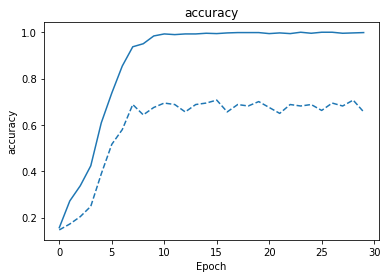

In [ ]:
plt.plot(history.epoch, history.history['accuracy'], color=colors[0], label='Train')
plt.plot(history.epoch, history.history['val_accuracy'],
         color=colors[0], linestyle="--", label='Val')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

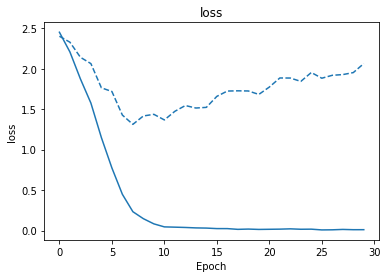

In [ ]:
plt.plot(history.epoch, history.history['loss'], color=colors[0], label='Train')
plt.plot(history.epoch, history.history['val_loss'],
         color=colors[0], linestyle="--", label='Val')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('loss')

#### w/ LR decay

Text(0.5, 1.0, 'accuracy')

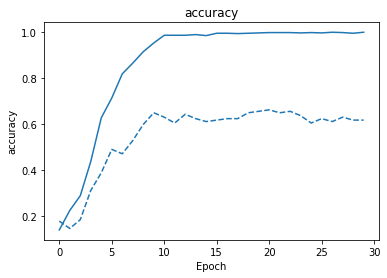

In [ ]:
plt.plot(history_lr.epoch, history_lr.history['accuracy'], color=colors[0], label='Train')
plt.plot(history_lr.epoch, history_lr.history['val_accuracy'],
         color=colors[0], linestyle="--", label='Val')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

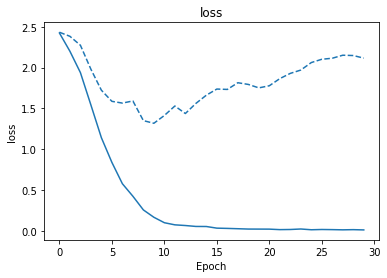

In [ ]:
plt.plot(history_lr.epoch, history_lr.history['loss'], color=colors[0], label='Train')
plt.plot(history_lr.epoch, history_lr.history['val_loss'],
         color=colors[0], linestyle="--", label='Val')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('loss')

### best params w/ early stopping 

In [52]:
embed_dim = 128  # Embedding size for each token
num_heads = 4  # Number of attention heads
ff_dim = 128  # Hidden layer size in feed forward network inside transformer
nclasses = 12
max_length = 250

inputs = layers.Input(shape=(max_length,))
embedding_layer = TokenAndPositionEmbedding(max_length, MAX_NB_WORDS, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(nclasses, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)


In [53]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy', 
    verbose=1,
    patience=5,
    mode='max',
    restore_best_weights=True)


In [54]:
#lr_schedule = keras.optimizers.schedules.ExponentialDecay(
#    initial_learning_rate=1e-2,
#    decay_steps=10000,
#    decay_rate=0.9)
#opt = keras.optimizers.Adam(learning_rate=lr_schedule)
#model.compile(opt, "sparse_categorical_crossentropy", metrics=["accuracy"])

model.compile('adam', "sparse_categorical_crossentropy", metrics=['accuracy'])


In [55]:
#run 4, w/o lr decay, dim = 128
history_es = model.fit(
    X_train_padded, y_train, batch_size=32, epochs=30, callbacks=[early_stopping], validation_data=(X_val_padded, y_val)
)

Epoch 1/30
22/22 [==============================] - 7s 302ms/step - loss: 2.4170 - accuracy: 0.1664 - val_loss: 2.4054 - val_accuracy: 0.1783
Epoch 2/30
22/22 [==============================] - 6s 284ms/step - loss: 2.2222 - accuracy: 0.2146 - val_loss: 2.3476 - val_accuracy: 0.1911
Epoch 3/30
22/22 [==============================] - 6s 287ms/step - loss: 2.0127 - accuracy: 0.2672 - val_loss: 2.2857 - val_accuracy: 0.2293
Epoch 4/30
22/22 [==============================] - 6s 287ms/step - loss: 1.7654 - accuracy: 0.3927 - val_loss: 2.1773 - val_accuracy: 0.2803
Epoch 5/30
22/22 [==============================] - 6s 286ms/step - loss: 1.3745 - accuracy: 0.5285 - val_loss: 1.9777 - val_accuracy: 0.3248
Epoch 6/30
22/22 [==============================] - 6s 288ms/step - loss: 0.9547 - accuracy: 0.6861 - val_loss: 1.7946 - val_accuracy: 0.3376
Epoch 7/30
22/22 [==============================] - 6s 287ms/step - loss: 0.5335 - accuracy: 0.8438 - val_loss: 1.5994 - val_accuracy: 0.4713
Epoch 

In [ ]:
#run 4b, w/o lr decay, dim = 128
history_es = model.fit(
    X_train_padded, y_train, batch_size=32, epochs=30, callbacks=[early_stopping], validation_data=(X_val_padded, y_val)
)

Epoch 1/30
22/22 [==============================] - 9s 407ms/step - loss: 2.4536 - accuracy: 0.1635 - val_loss: 2.3937 - val_accuracy: 0.1911
Epoch 2/30
22/22 [==============================] - 8s 386ms/step - loss: 2.1685 - accuracy: 0.2292 - val_loss: 2.3137 - val_accuracy: 0.1465
Epoch 3/30
22/22 [==============================] - 9s 391ms/step - loss: 1.8075 - accuracy: 0.3898 - val_loss: 2.2717 - val_accuracy: 0.2548
Epoch 4/30
22/22 [==============================] - 9s 389ms/step - loss: 1.4772 - accuracy: 0.5022 - val_loss: 2.0934 - val_accuracy: 0.2548
Epoch 5/30
22/22 [==============================] - 8s 386ms/step - loss: 1.0770 - accuracy: 0.6219 - val_loss: 1.8186 - val_accuracy: 0.3694
Epoch 6/30
22/22 [==============================] - 8s 381ms/step - loss: 0.7219 - accuracy: 0.7460 - val_loss: 1.4999 - val_accuracy: 0.5032
Epoch 7/30
22/22 [==============================] - 8s 381ms/step - loss: 0.3284 - accuracy: 0.8978 - val_loss: 1.3501 - val_accuracy: 0.6561
Epoch 

In [ ]:
#run 4c, w/o lr decay, dim = 128
history_es = model.fit(
    X_train_padded, y_train, batch_size=32, epochs=30, callbacks=[early_stopping], validation_data=(X_val_padded, y_val)
)

Epoch 1/30
22/22 [==============================] - 9s 392ms/step - loss: 2.4317 - accuracy: 0.1314 - val_loss: 2.4567 - val_accuracy: 0.1401
Epoch 2/30
22/22 [==============================] - 8s 380ms/step - loss: 2.2665 - accuracy: 0.2204 - val_loss: 2.3420 - val_accuracy: 0.1720
Epoch 3/30
22/22 [==============================] - 8s 380ms/step - loss: 2.0009 - accuracy: 0.3109 - val_loss: 2.2303 - val_accuracy: 0.2357
Epoch 4/30
22/22 [==============================] - 8s 385ms/step - loss: 1.6486 - accuracy: 0.4701 - val_loss: 2.0688 - val_accuracy: 0.2866
Epoch 5/30
22/22 [==============================] - 9s 389ms/step - loss: 1.2908 - accuracy: 0.5664 - val_loss: 1.8933 - val_accuracy: 0.3503
Epoch 6/30
22/22 [==============================] - 9s 391ms/step - loss: 0.8839 - accuracy: 0.7036 - val_loss: 1.6152 - val_accuracy: 0.4268
Epoch 7/30
22/22 [==============================] - 9s 395ms/step - loss: 0.5375 - accuracy: 0.8292 - val_loss: 1.4249 - val_accuracy: 0.5541
Epoch 

#### plots

Text(0.5, 1.0, 'accuracy')

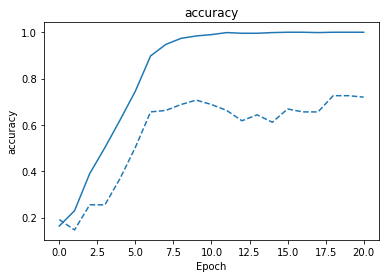

In [ ]:
plt.plot(history_es.epoch, history_es.history['accuracy'], color=colors[0], label='Train')
plt.plot(history_es.epoch, history_es.history['val_accuracy'],
         color=colors[0], linestyle="--", label='Val')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

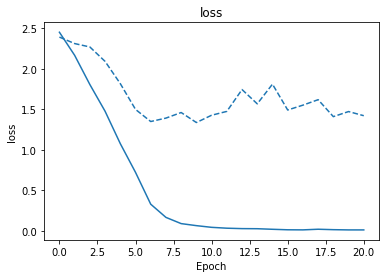

In [ ]:
plt.plot(history_es.epoch, history_es.history['loss'], color=colors[0], label='Train')
plt.plot(history_es.epoch, history_es.history['val_loss'],
         color=colors[0], linestyle="--", label='Val')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('loss')

### prediction and misclassified

In [19]:
train_predicted = model.predict(X_train_padded)
val_predicted = model.predict(X_val_padded)  
test_predicted = model.predict(X_test_padded)   
#result = numpy.absolute(trainingClasses-predicted)

In [25]:
model.evaluate(X_val_padded, y_val)

5/5 [==============================] - 0s 67ms/step - loss: 2.4037 - accuracy: 0.5987


[2.4036824703216553, 0.5987260937690735]

In [56]:
model.evaluate(X_test_padded, y_test)

3/3 [==============================] - 0s 43ms/step - loss: 1.2927 - accuracy: 0.7000


[1.292657732963562, 0.699999988079071]

In [22]:
authors = list(set(author_train))

In [23]:
authors = sorted(authors)

In [57]:
for i in range(12):
  print (authors[i])
  ind = np.where(y_test == i)
  X = X_test_padded[ind]
  y = y_test[ind]
  model.evaluate(X, y)


Alfred, Lord Tennyson
1/1 [==============================] - 0s 1ms/step - loss: 2.0005 - accuracy: 0.5000
Emily Dickinson
1/1 [==============================] - 0s 1ms/step - loss: 2.1707 - accuracy: 0.8000
John Ashbery
1/1 [==============================] - 0s 1ms/step - loss: 3.0946 - accuracy: 0.4286
John Donne
1/1 [==============================] - 0s 1ms/step - loss: 2.0428 - accuracy: 0.4000
Kay Ryan
1/1 [==============================] - 0s 1ms/step - loss: 2.1051 - accuracy: 0.2500
Percy sshe Shelley
1/1 [==============================] - 0s 1ms/step - loss: 0.5151 - accuracy: 0.9500
Rae Armantrout
1/1 [==============================] - 0s 1ms/step - loss: 0.1236 - accuracy: 1.0000
Walt Whitman
1/1 [==============================] - 0s 1ms/step - loss: 0.8948 - accuracy: 0.7500
William Butler Yeats
1/1 [==============================] - 0s 1ms/step - loss: 2.8474 - accuracy: 0.2500
William Shakespeare
1/1 [==============================] - 0s 1ms/step - loss: 0.5757 - accuracy

In [ ]:
# check 
ind = np.where(y_val == 2)
X = X_val_padded[ind]
y = y_val[ind]
model.evaluate(X, y)

1/1 [==============================] - 0s 1ms/step - loss: 1.0474 - accuracy: 0.6364


[1.0473517179489136, 0.6363636255264282]

In [ ]:
np.argmax(val_predicted[0])
y_encode = np.zeros([len(y_val),12])
for i in range(len(y_val)):
  y_encode[i][np.argmax(val_predicted[i])] = 1
y_encode.shape

(157, 12)

In [ ]:
pred=[]
for i in y_encode:
  pred.append(np.argmax(i))
pred

In [ ]:
author_labels_ind = list(pd.Series(y_val).value_counts().index)
author_labels_ind

[0, 10, 9, 8, 7, 6, 1, 2, 5, 3, 11, 4]

In [ ]:
def get_key(val, my_dict): 
    for key, value in my_dict.items(): 
         if val == value: 
             return key 
  
    return "key doesn't exist"

In [ ]:
author_labels =  []
for i in author_labels_ind:
  author = get_key(i, le_name_mapping)
  author_labels.append(author)

In [ ]:
y_true = []
for i in y_val:
  author = get_key(i, le_name_mapping)
  y_true.append(author)

y_pred = []
for i in pred:
  author = get_key(i, le_name_mapping)
  pred.append(author)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(33.0, 0.5, 'True')

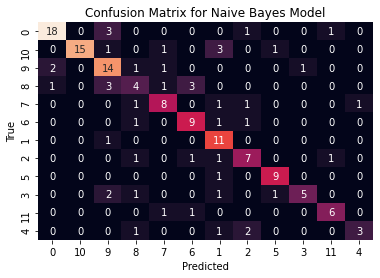

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

#author_labels = list(pd.Series(y_val).value_counts().index)

fig, ax = plt.subplots()

sn.heatmap(confusion_matrix(y_true = y_val, y_pred = pred, labels = author_labels), 
           annot = True,
           xticklabels = author_labels,
           yticklabels = author_labels,
           cbar = False,
           ax = ax)

ax.set_title("Confusion Matrix for Naive Bayes Model")
ax.set_xlabel("Predicted")
ax.set_ylabel("True")


Text(32.99999999999999, 0.5, 'True')

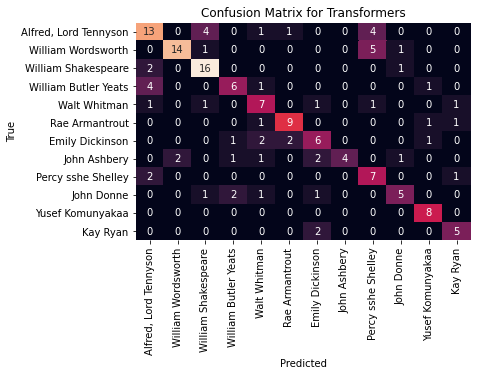

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

#author_labels = list(pd.Series(y_val).value_counts().index)

fig, ax = plt.subplots()

sn.heatmap(confusion_matrix(y_true = y_val, y_pred = pred, labels = author_labels_ind), 
           annot = True,
           xticklabels = author_labels,
           yticklabels = author_labels,
           cbar = False,
           ax = ax)

ax.set_title("Confusion Matrix for Transformers")
ax.set_xlabel("Predicted")
ax.set_ylabel("True")


### Imbalance class treatment

#### class weights

In [31]:
Counter(author_train)

Counter({'Alfred, Lord Tennyson': 106,
         'Emily Dickinson': 40,
         'John Ashbery': 40,
         'John Donne': 40,
         'Kay Ryan': 29,
         'Percy sshe Shelley': 73,
         'Rae Armantrout': 44,
         'Walt Whitman': 83,
         'William Butler Yeats': 36,
         'William Shakespeare': 86,
         'William Wordsworth': 76,
         'Yusef Komunyakaa': 32})

In [32]:
total = len(author_train)

In [33]:
author_count = Counter(y_train)

In [34]:
# Scaling by total/12 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
class_weight = {}
for i in range(12):
  weight = (1 / author_count[i])*(total)/12.0
  class_weight[i] = weight
  
class_weight

#print('Weight for class 0: {:.2f}'.format(weight_for_0))
#print('Weight for class 1: {:.2f}'.format(weight_for_1))


{0: 0.5385220125786163,
 1: 1.4270833333333333,
 2: 1.4270833333333333,
 3: 1.4270833333333333,
 4: 1.968390804597701,
 5: 0.7819634703196346,
 6: 1.2973484848484849,
 7: 0.6877510040160643,
 8: 1.585648148148148,
 9: 0.6637596899224806,
 10: 0.7510964912280702,
 11: 1.7838541666666667}

In [46]:
embed_dim = 64 # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 64  # Hidden layer size in feed forward network inside transformer
nclasses = 12
max_length = 250

inputs = layers.Input(shape=(max_length,))
embedding_layer = TokenAndPositionEmbedding(max_length, MAX_NB_WORDS, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(nclasses, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)


In [47]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy', 
    verbose=1,
    patience=5,
    mode='max',
    restore_best_weights=True)


In [48]:
#lr_schedule = keras.optimizers.schedules.ExponentialDecay(
#    initial_learning_rate=1e-2,
#    decay_steps=10000,
#    decay_rate=0.9)
#opt = keras.optimizers.Adam(learning_rate=lr_schedule)
#model.compile(opt, "sparse_categorical_crossentropy", metrics=["accuracy"])

model.compile('adam', "sparse_categorical_crossentropy", metrics=['accuracy'])


In [42]:
#run 5, w/o lr decay, dim = 128, w/ class weights
history_ww = model.fit(
    X_train_padded, y_train, batch_size=32, epochs=30, callbacks=[early_stopping], validation_data=(X_val_padded, y_val),class_weight=class_weight
)

Epoch 1/30
22/22 [==============================] - 4s 183ms/step - loss: 2.4744 - accuracy: 0.1139 - val_loss: 2.4737 - val_accuracy: 0.1019
Epoch 2/30
22/22 [==============================] - 4s 168ms/step - loss: 2.3145 - accuracy: 0.1839 - val_loss: 2.3735 - val_accuracy: 0.1401
Epoch 3/30
22/22 [==============================] - 4s 171ms/step - loss: 2.1086 - accuracy: 0.3139 - val_loss: 2.2835 - val_accuracy: 0.2102
Epoch 4/30
22/22 [==============================] - 4s 169ms/step - loss: 1.7491 - accuracy: 0.5007 - val_loss: 2.0246 - val_accuracy: 0.2803
Epoch 5/30
22/22 [==============================] - 4s 171ms/step - loss: 1.3162 - accuracy: 0.6117 - val_loss: 1.8254 - val_accuracy: 0.4140
Epoch 6/30
22/22 [==============================] - 4s 171ms/step - loss: 0.9615 - accuracy: 0.7328 - val_loss: 1.5313 - val_accuracy: 0.4904
Epoch 7/30
22/22 [==============================] - 4s 171ms/step - loss: 0.6929 - accuracy: 0.8248 - val_loss: 1.5786 - val_accuracy: 0.4395
Epoch 

In [49]:
#run 5b, w/o lr decay, dim = 128, w/ class weights
history_ww = model.fit(
    X_train_padded, y_train, batch_size=32, epochs=30, callbacks=[early_stopping], validation_data=(X_val_padded, y_val),class_weight=class_weight
)

Epoch 1/30
22/22 [==============================] - 3s 152ms/step - loss: 2.4761 - accuracy: 0.1080 - val_loss: 2.4457 - val_accuracy: 0.0955
Epoch 2/30
22/22 [==============================] - 3s 138ms/step - loss: 2.3572 - accuracy: 0.1606 - val_loss: 2.3777 - val_accuracy: 0.1656
Epoch 3/30
22/22 [==============================] - 3s 135ms/step - loss: 2.1591 - accuracy: 0.2146 - val_loss: 2.3722 - val_accuracy: 0.1274
Epoch 4/30
22/22 [==============================] - 3s 138ms/step - loss: 1.8848 - accuracy: 0.3620 - val_loss: 2.0989 - val_accuracy: 0.2229
Epoch 5/30
22/22 [==============================] - 3s 134ms/step - loss: 1.5357 - accuracy: 0.5401 - val_loss: 1.9326 - val_accuracy: 0.3503
Epoch 6/30
22/22 [==============================] - 3s 133ms/step - loss: 1.1665 - accuracy: 0.6584 - val_loss: 1.8653 - val_accuracy: 0.4140
Epoch 7/30
22/22 [==============================] - 3s 133ms/step - loss: 0.8407 - accuracy: 0.7620 - val_loss: 1.8313 - val_accuracy: 0.4076
Epoch 

In [50]:
model.evaluate(X_test_padded, y_test)

3/3 [==============================] - 0s 20ms/step - loss: 1.5359 - accuracy: 0.6750


[1.535851001739502, 0.675000011920929]

In [43]:
authors = list(set(author_train))

In [44]:
authors = sorted(authors)

In [51]:
for i in range(12):
  print (authors[i])
  ind = np.where(y_test == i)
  X = X_test_padded[ind]
  y = y_test[ind]
  model.evaluate(X, y)


Alfred, Lord Tennyson
1/1 [==============================] - 0s 2ms/step - loss: 0.3823 - accuracy: 0.8750
Emily Dickinson
1/1 [==============================] - 0s 1ms/step - loss: 1.1161 - accuracy: 0.8000
John Ashbery
1/1 [==============================] - 0s 1ms/step - loss: 4.4362 - accuracy: 0.2857
John Donne
1/1 [==============================] - 0s 1ms/step - loss: 2.7483 - accuracy: 0.6000
Kay Ryan
1/1 [==============================] - 0s 1ms/step - loss: 0.5450 - accuracy: 0.7500
Percy sshe Shelley
1/1 [==============================] - 0s 2ms/step - loss: 0.7296 - accuracy: 0.9000
Rae Armantrout
1/1 [==============================] - 0s 2ms/step - loss: 0.2653 - accuracy: 0.8333
Walt Whitman
1/1 [==============================] - 0s 1ms/step - loss: 2.1155 - accuracy: 0.5000
William Butler Yeats
1/1 [==============================] - 0s 2ms/step - loss: 5.6093 - accuracy: 0.0000e+00
William Shakespeare
1/1 [==============================] - 0s 1ms/step - loss: 0.6420 - accu

##### plots - imbalance class treatment

Text(0.5, 1.0, 'accuracy')

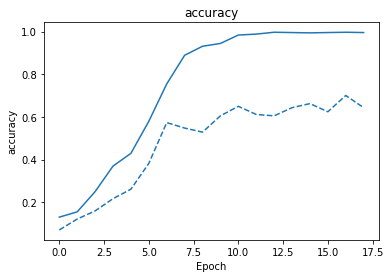

In [ ]:
plt.plot(history_ww.epoch, history_ww.history['accuracy'], color=colors[0], label='Train')
plt.plot(history_ww.epoch, history_ww.history['val_accuracy'],
         color=colors[0], linestyle="--", label='Val')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

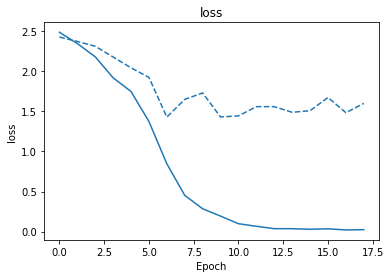

In [ ]:
plt.plot(history_ww.epoch, history_ww.history['loss'], color=colors[0], label='Train')
plt.plot(history_ww.epoch, history_ww.history['val_loss'],
         color=colors[0], linestyle="--", label='Val')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('loss')

##### prediction and misclassified - imbalance class treatment 

In [ ]:
train_predicted = model.predict(X_train_padded)  
test_predicted = model.predict(X_test_padded)   
#result = numpy.absolute(trainingClasses-predicted)

In [ ]:
model.evaluate(X_val_padded, y_val)

5/5 [==============================] - 0s 82ms/step - loss: 1.5580 - accuracy: 0.6051


[1.5580226182937622, 0.6050955653190613]

In [ ]:
model.evaluate(X_test_padded, y_test)

3/3 [==============================] - 0s 56ms/step - loss: 1.4397 - accuracy: 0.6625


[1.4397294521331787, 0.6625000238418579]

#### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_padded, y_train = oversample.fit_resample(X_train_padded, y_train)

In [ ]:
embed_dim = 128  # Embedding size for each token
num_heads = 4  # Number of attention heads
ff_dim = 128  # Hidden layer size in feed forward network inside transformer
nclasses = 12
max_length = 250

inputs = layers.Input(shape=(max_length,))
embedding_layer = TokenAndPositionEmbedding(max_length, MAX_NB_WORDS, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(nclasses, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)


In [ ]:
#lr_schedule = keras.optimizers.schedules.ExponentialDecay(
#    initial_learning_rate=1e-2,
#    decay_steps=10000,
#    decay_rate=0.9)
#opt = keras.optimizers.Adam(learning_rate=lr_schedule)
#model.compile(opt, "sparse_categorical_crossentropy", metrics=["accuracy"])

model.compile('adam', "sparse_categorical_crossentropy", metrics=["accuracy"])


In [ ]:
history_smote = model.fit(
    X_train_padded, y_train, batch_size=32, epochs=30, validation_data=(X_val_padded, y_val)
)

Epoch 1/30
40/40 [==============================] - 16s 399ms/step - loss: 2.3907 - accuracy: 0.1580 - val_loss: 2.4671 - val_accuracy: 0.1210
Epoch 2/30
40/40 [==============================] - 16s 394ms/step - loss: 2.1501 - accuracy: 0.2516 - val_loss: 2.2866 - val_accuracy: 0.2038
Epoch 3/30
40/40 [==============================] - 16s 397ms/step - loss: 1.7810 - accuracy: 0.3608 - val_loss: 2.4348 - val_accuracy: 0.1975
Epoch 4/30
40/40 [==============================] - 16s 391ms/step - loss: 1.3939 - accuracy: 0.5110 - val_loss: 2.2910 - val_accuracy: 0.2484
Epoch 5/30
40/40 [==============================] - 16s 393ms/step - loss: 0.9357 - accuracy: 0.6777 - val_loss: 1.9569 - val_accuracy: 0.3822
Epoch 6/30
40/40 [==============================] - 16s 391ms/step - loss: 0.6040 - accuracy: 0.7854 - val_loss: 2.7427 - val_accuracy: 0.3312
Epoch 7/30
40/40 [==============================] - 16s 389ms/step - loss: 0.4198 - accuracy: 0.8640 - val_loss: 2.6384 - val_accuracy: 0.3567